# K-Nearest Neighbors

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.plot_functions import *
from src.knn_algorithm import KNN
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score

### Selecting dataset **Iris Flower Dataset:**
**Iris Dataset Features:**
* **Number of instances (samples):** 150
* **Number of features:** 4 (sepal length and width, petal length and width)
* **Number of classes (labels):** 3 (Setosa, Versicolor and Virginica)
* **Class distribution:** Balanced (each class has 50 instances)

In [92]:
iris = load_iris()

In [94]:
X, y = iris.data, iris.target

### Iris DataFrame Distribution

In [95]:
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df["species"] = y

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


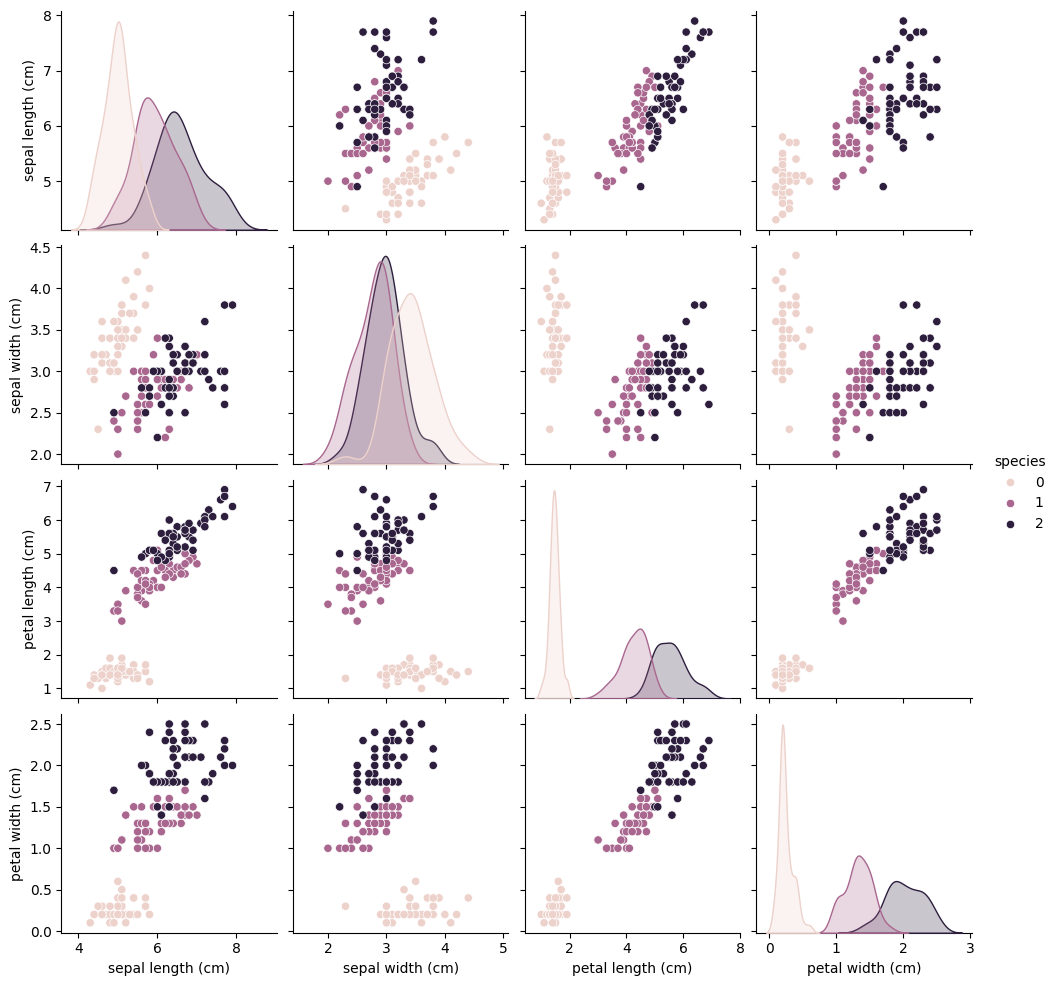

In [96]:
sns.pairplot(iris_df, hue="species")
plt.show()

## KNN for Iris dataset

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [98]:
model = KNN(k=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

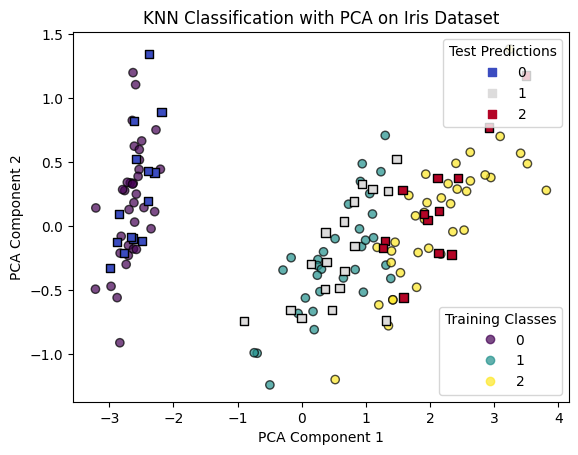

In [99]:
plot_knn_pca(X_train, y_train, X_test, y_pred, "Iris Dataset")

**Interpretation:**
- The plot uses PCA to reduce the dimensionality of the Iris data set, allowing visualization in a two-dimensional space.
- The training points are dispersed in this space according to their main components.
- The predictions for the test data are overlaid in the same space, allowing the KNN model predictions to be visually compared with the distribution of the training classes.

**Purpose:**
- Visually evaluate the performance of the KNN model.
- Verify how test predictions align with the structure of the training data.

In [100]:
print(classification_report(y_test, y_pred))
print("Accuracy score: ", round(accuracy_score(y_test, y_pred), 2))
print("F1 score: ", round(f1_score(y_test, y_pred, average='macro'), 2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Accuracy score:  0.96
F1 score:  0.96


### Confusion Matrix

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

[Confusion matrix using Iris dataset example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

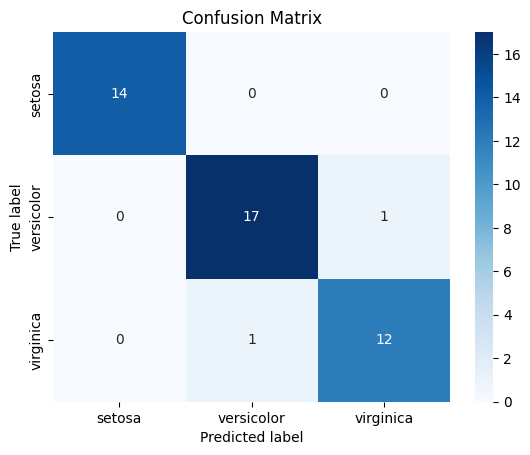

In [101]:
plot_confusion_matrix(y_test, y_pred, labels=np.unique(iris.target_names))

## Scaled Iris dataset

In [102]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
model.fit(X_train_scaled, y_train)

y_pred_scaled = model.predict(X_test_scaled)

In [104]:
print(classification_report(y_test, y_pred_scaled))
print("Accuracy score: ", round(accuracy_score(y_test, y_pred_scaled), 2))
print("F1 score: ", round(f1_score(y_test, y_pred_scaled, average='macro'), 2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Accuracy score:  0.96
F1 score:  0.96


## Elbow method

### Custom KNN implementation

In [105]:
max_k = 40
scores = np.zeros(max_k)

for k in range(1, max_k + 1):
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = f1_score(y_test, y_pred, average="weighted")
    scores[k - 1] = score

### SKLearn implementation

In [107]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_scores = np.zeros(max_k)

for k in range(1, max_k + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    score = f1_score(y_test, y_pred, average="weighted")
    sklearn_scores[k - 1] = score

### Custom vs sklearn results

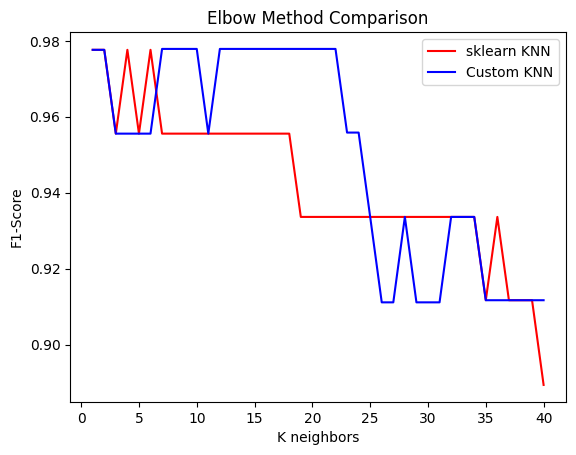

In [108]:
plt.plot(range(1, max_k + 1), sklearn_scores, color='r', label='sklearn KNN')
plt.plot(range(1, max_k + 1), scores, color='b', label='Custom KNN')
plt.title('Elbow Method Comparison')
plt.xlabel('K neighbors')
plt.ylabel('F1-Score')
plt.legend()
plt.show()

The results you have obtained show some fluctuations in the F1-Score as the number of neighbors k varies, both for the custom KNN implementation and for sklearn's KNeighborsClassifier.
Here are some key points to consider:
- **Overall Similarity:**
    - The general shape of the two curves is quite similar, indicating that custom KNN implementation is working correctly and producing results comparable to the sklearn implementation.
- **Fluctuations:**
    - Fluctuations in the F1-Score as it changes k are normal and may be due to how the data is divided, the specific characteristics of the dataset, and the nature of the KNN method.
    - These fluctuations also reflect how different values of k can cause the model to overfit or underfit the data.
- **Overall Performance:**
    - Both models show a high F1-Score for lower values of k (1-10), which is expected since in small datasets like Iris, low values of k tend to work well.
    - As k increases, precision decreases, which is also expected since the model tends to oversimplify.

## Cross Validation for both models

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Create a scorer based on F1-score
f1_scorer = make_scorer(f1_score, average='weighted')

# Use cross_val_score with KNeighborsClassifier
sklearn_knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(sklearn_knn, X_train_scaled, y_train, cv=5, scoring=f1_scorer)
print(f"F1-Score (sklearn, k=3): {scores.mean()}")

# Implement cross-validation manually for your custom KNN
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
custom_scores = []

for train_index, test_index in kf.split(X_train_scaled):
    X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    knn = KNN(k=3)
    knn.fit(X_train_fold, y_train_fold)
    y_pred_fold = knn.predict(X_test_fold)
    score = f1_score(y_test_fold, y_pred_fold, average='weighted')
    custom_scores.append(score)

print(f"F1-Score (custom, k=3): {np.mean(custom_scores)}")


F1-Score (sklearn, k=3): 0.9424619824619824
F1-Score (custom, k=3): 0.9520217766011279


---

## Custom dataset for test KNN

In [113]:
X, y = make_classification(
    n_samples=1000,
    n_features=5,
    n_informative=3,
    n_classes=2,
    flip_y=0.1,
    class_sep=0.5,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

n_neighbors = 3

model = KNN(k=n_neighbors)
model.fit(X_train, y_train)
y_pred = model.predict(X_test, False)

In [114]:
print(classification_report(y_test, y_pred))
print("Accuracy score: ", round(accuracy_score(y_test, y_pred), 2))
print("F1 score: ", round(f1_score(y_test, y_pred, average='macro'), 2))

              precision    recall  f1-score   support

           0       0.86      0.66      0.75       110
           1       0.68      0.87      0.76        90

    accuracy                           0.76       200
   macro avg       0.77      0.77      0.75       200
weighted avg       0.78      0.76      0.75       200

Accuracy score:  0.76
F1 score:  0.75


In [116]:
from sklearn.neighbors import KNeighborsClassifier

scores = np.zeros(max_k)

for k in range(1, max_k + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    score = f1_score(y_test, y_pred, average="weighted")
    scores[k - 1] = score

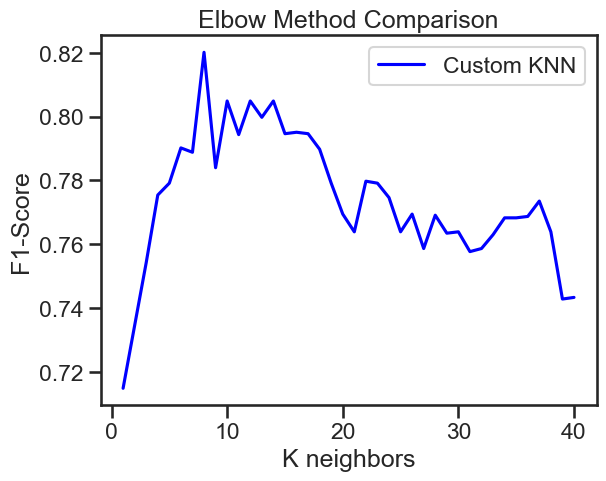

In [120]:
sns.set_context('talk')
sns.set_style('ticks')
plt.plot(range(1, max_k + 1), scores, color='b', label='Custom KNN')
plt.title('Elbow Method Comparison')
plt.xlabel('K neighbors')
plt.ylabel('F1-Score')
plt.legend()
plt.show()